<a href="https://colab.research.google.com/github/JonatanPolanco/Content_Classification/blob/main/EAnalysis_%26_Preprocessing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install transformers

In [2]:
!pip install langdetect

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 981.5/981.5 kB 5.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langdetect: filename=langdetect-1.0.9-py3-none-any.whl size=993225 sha256=09b101a7de6f0d33de3dcebdccb6bddbb05c68b3573dc2a4bdc8e847b6ec566d
  Stored in directory: /root/.cache/pip/wheels/95/03/7d/59ea870c70ce4e5a370638b5462a7711ab78fba2f655d05106
Successfully built langdetect


In [2]:
import pandas as pd
url1 = 'https://raw.githubusercontent.com/LinaAguilar0697/content_classification/main/Notebooks/competence_definitions.csv'
url2 = 'https://raw.githubusercontent.com/LinaAguilar0697/content_classification/main/Notebooks/contenidos_con_detalle.csv'
url3 ='https://raw.githubusercontent.com/LinaAguilar0697/content_classification/main/Notebooks/new_content.csv'

competence_definitions = pd.read_csv(url1)
classified_content  = pd.read_csv(url2)
new_content = pd.read_csv(url3)

#Análisis exploratorio

In [4]:
competence_definitions.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 156 entries, 0 to 155
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id_competence          156 non-null    float64
 1   competence             156 non-null    object 
 2   competence_definition  156 non-null    object 
 3   id_skill               156 non-null    float64
 4   ability                156 non-null    object 
 5   ability_definition     156 non-null    object 
 6   course_abilities       156 non-null    object 
dtypes: float64(2), object(5)
memory usage: 8.7+ KB


In [5]:
classified_content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7968 entries, 0 to 7967
Data columns (total 25 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   ID                              7968 non-null   int64  
 1   ACADEMIA                        7968 non-null   object 
 2   NIVEL                           7968 non-null   object 
 3   TIPO                            7968 non-null   object 
 4   NOMBRE FINAL                    7968 non-null   object 
 5   LANZAMIENTO                     7968 non-null   object 
 6   AUDIENCIA POR NIVEL DE GESTIÓN  7968 non-null   object 
 7   DESCRIPCIÓN                     7418 non-null   object 
 8   COMPETENCIA                     7968 non-null   object 
 9   HABILIDAD PRINCIPAL             7968 non-null   object 
 10  HABILIDAD 2                     7968 non-null   object 
 11  HABILIDAD 3                     7236 non-null   object 
 12  COMPETENCIA 2                   0 

In [6]:
new_content.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4664 entries, 0 to 4663
Data columns (total 4 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   title                  4664 non-null   object
 1   description            4664 non-null   object
 2   course_description     4664 non-null   object
 3   course_description_py  4664 non-null   object
dtypes: object(4)
memory usage: 145.9+ KB


In [7]:
# --------------- Revisión habilidad 1 y 2 iguales en misma competencia
resultado = classified_content[classified_content['HABILIDAD PRINCIPAL'] == classified_content['HABILIDAD 2']][['COMPETENCIA', 'HABILIDAD PRINCIPAL', 'HABILIDAD 2']]
resultado

,COMPETENCIA,HABILIDAD PRINCIPAL,HABILIDAD 2
236,Administración de negocios,Estrategia,Estrategia
239,Marketing digital,Product marketing,Product marketing
622,Innovación,Pensamiento disruptivo,Pensamiento disruptivo
934,Productividad,Organización,Organización
3377,Desarrollo de software,Software testing,Software testing
3378,Desarrollo de software,Software testing,Software testing
3466,Desarrollo de software,Software testing,Software testing
3467,Desarrollo de software,Software testing,Software testing
3508,Herramientas tecnológicas,Aplicaciones Microsoft,Aplicaciones Microsoft
3631,People management,Gestión del desempeño,Gestión del desempeño


Revisión regla: Una habilidad principal solo puede pertenecer a una competencia

In [8]:

# Agrupar por 'HABILIDAD PRINCIPAL' y contar los valores únicos de 'COMPETENCIA' para cada habilidad principal
conteo_competencias = classified_content.groupby('HABILIDAD PRINCIPAL')['COMPETENCIA'].nunique()


# Filtrar las habilidades principales con más de un valor único de COMPETENCIA
habilidades_con_multiples_competencias = conteo_competencias[conteo_competencias > 1]

print(habilidades_con_multiples_competencias)

HABILIDAD PRINCIPAL
Balance de vida         2
Sostenibilidad y RSE    2
Name: COMPETENCIA, dtype: int64


In [9]:
import pandas as pd

habilidades_con_multiples_competencias = classified_content.groupby('HABILIDAD PRINCIPAL').filter(lambda x: x['COMPETENCIA'].nunique() > 1)

# Filtrar las filas donde 'HABILIDAD PRINCIPAL' es igual a 'Balance de vida'
balance_de_vida = habilidades_con_multiples_competencias[habilidades_con_multiples_competencias['HABILIDAD PRINCIPAL'] == 'Balance de vida']
Sostenibilidad  = habilidades_con_multiples_competencias[habilidades_con_multiples_competencias['HABILIDAD PRINCIPAL'] == 'Sostenibilidad y RSE']

# Obtener los valores únicos de la columna 'COMPETENCIA' para 'Balance de vida'
valores_unicos = balance_de_vida['COMPETENCIA'].unique()
valores_unicos_2 = Sostenibilidad['COMPETENCIA'].unique()

print(valores_unicos)
print(valores_unicos_2)

## Hay un problema: las habilidades anteriormente impresas, estan relacionadas a dos competencias


['Wellness' 'Productividad']
['Administración de negocios' 'Gestión de procesos y operaciones']


Revisión regla: Una competencia puede estar asociada a multiples habilidades principales
#Distribución de habilidad principal por competencia

In [10]:


# Agrupar por 'COMPETENCIA' y contar los valores únicos de 'HABILIDAD PRINCIPAL' para cada COMPETENCIA
conteo_competencias = classified_content.groupby('COMPETENCIA')['HABILIDAD PRINCIPAL'].nunique()
registros_competencias = classified_content.groupby('COMPETENCIA')['HABILIDAD PRINCIPAL'].count()
merged = pd.merge(conteo_competencias, registros_competencias, on= 'COMPETENCIA',how = 'inner')

# Filtrar las habilidades principales con más de un valor único de HABILIDAD PRINCIPAL
#habilidades_con_multiples_competencias = conteo_competencias[conteo_competencias > 1]

merged = merged.rename(columns={'HABILIDAD PRINCIPAL_x': 'conteo_skills_1',
                                'HABILIDAD PRINCIPAL_y': 'conteo_registros'})
merged

,conteo_skills_1,conteo_registros
COMPETENCIA,,
Accountability,3,143
Administración de negocios,6,430
Agilidad,2,63
Comunicación,7,203
Data skills,7,211
Desarrollo de software,5,169
Desarrollo web,3,294
Digital skills,4,127
Emprendimiento,3,192


In [11]:
new_content.head()

,title,description,course_description,course_description_py
0,"Vuelos de conexión: la pérdida de tiempo, un d...","Trece años de investigación sobre más de 2,000...","Vuelos de conexión: la pérdida de tiempo, un d...","Vuelos de conexión: la pérdida de tiempo, un d..."
1,¿Cómo enfoca el conflicto?,Este contenido explora dos estilos de manejo d...,¿Cómo enfoca el conflicto?:\nEste contenido ex...,¿Cómo enfoca el conflicto?: \nEste contenido e...
2,Cómo es realmente una buena escucha,Este contenido enfatiza la importancia de ser ...,Cómo es realmente una buena escucha:\nEste con...,Cómo es realmente una buena escucha: \nEste co...
3,Convertir un conflicto en una relación más sana,El autor comparte una valiosa lección aprendid...,Convertir un conflicto en una relación más san...,Convertir un conflicto en una relación más san...
4,Cuestionar una hipótesis para tomar una decisi...,El autor reflexiona sobre el proceso de toma d...,Cuestionar una hipótesis para tomar una decisi...,Cuestionar una hipótesis para tomar una decisi...


Qué porcentaje de los datos que vamos a clasificar está en inglés?

In [12]:
from langdetect import detect
import pandas as pd



def detectar_idioma(texto):
    try:
        return detect(texto)
    except:
        return None


idiomas_detectados = classified_content['DESCRIPCIÓN'].apply(detectar_idioma)

# Contar la cantidad de celdas que se detectaron como inglés
conteo_ingles = (idiomas_detectados == 'en').sum()

# Calcular el porcentaje de celdas en inglés
porcentaje_ingles = (conteo_ingles / len(new_content)) * 100

print(f"Porcentaje de texto en inglés: {porcentaje_ingles}%")


Porcentaje de texto en inglés: 39.62264150943396%


#Pre-procesamiento

In [3]:
a = classified_content[(classified_content['HABILIDAD PRINCIPAL'] == 'Balance de vida') & (classified_content['COMPETENCIA'] == 'Wellness')].count()[0]
b = classified_content[(classified_content['HABILIDAD PRINCIPAL'] == 'Balance de vida') & (classified_content['COMPETENCIA'] == 'Productividad')].count()[0]
c = classified_content[(classified_content['HABILIDAD PRINCIPAL'] == 'Sostenibilidad y RSE') & (classified_content['COMPETENCIA'] == 'Administración de negocios')].count()[0]
d = classified_content[(classified_content['HABILIDAD PRINCIPAL'] == 'Sostenibilidad y RSE') & (classified_content['COMPETENCIA'] == 'Gestión de procesos y operaciones')].count()[0]
print(a,b)
print(c,d)
##Nos debemos eliminar los registros que tienen habilidad principal Balance de vida y competencia Productividad
## y los registros que tienen habilidad principal Sostenibilidad y RSE y competencia Gestión de procesos y operaciones

48 1
85 7


eliminamos registros que no cumplen con las reglas de clasificación (Mal clasificados manualmente)


In [4]:
mask1 = (classified_content['HABILIDAD PRINCIPAL'] == 'Balance de vida') & (classified_content['COMPETENCIA'] == 'Productividad')
classified_content_ = classified_content[~mask1]

In [5]:
mask2 = (classified_content_['HABILIDAD PRINCIPAL'] == 'Sostenibilidad y RSE') & (classified_content_['COMPETENCIA'] == 'Gestión de procesos y operaciones')
classified_content_ = classified_content_[~mask2]

In [6]:
a = classified_content_[(classified_content_['HABILIDAD PRINCIPAL'] == 'Balance de vida') & (classified_content_['COMPETENCIA'] == 'Wellness')].count()[0]
b = classified_content_[(classified_content_['HABILIDAD PRINCIPAL'] == 'Balance de vida') & (classified_content_['COMPETENCIA'] == 'Productividad')].count()[0]
c = classified_content_[(classified_content_['HABILIDAD PRINCIPAL'] == 'Sostenibilidad y RSE') & (classified_content_['COMPETENCIA'] == 'Administración de negocios')].count()[0]
d = classified_content_[(classified_content_['HABILIDAD PRINCIPAL'] == 'Sostenibilidad y RSE') & (classified_content_['COMPETENCIA'] == 'Gestión de procesos y operaciones')].count()[0]
print(a,b)
print(c,d)

48 0
85 0


In [7]:
# Agrupar por 'HABILIDAD PRINCIPAL' y contar los valores únicos de 'COMPETENCIA' para cada habilidad principal
conteo_competencias = classified_content_.groupby('HABILIDAD PRINCIPAL')['COMPETENCIA'].nunique()


# Filtrar las habilidades principales con más de un valor único de COMPETENCIA
habilidades_con_multiples_competencias = conteo_competencias[conteo_competencias > 1]

print(habilidades_con_multiples_competencias)

Series([], Name: COMPETENCIA, dtype: int64)


incluimos descripcion de habilidad principal en el df de contenidos clasificados manualmente

In [8]:
ground_truth = classified_content_[['NOMBRE FINAL','DESCRIPCIÓN', 'HABILIDAD PRINCIPAL']].rename(columns={'NOMBRE FINAL': 'nombre_contenido', 'DESCRIPCIÓN': 'descripcion_contenido','HABILIDAD PRINCIPAL': 'skill_1'})
new_content_ = new_content[['title', 'description', 'course_description_py']].rename(columns={'title': 'nombre_contenido', 'course_description_py': 'nombre_contenido_def'})
competence_definitions_ = competence_definitions[['ability', 'ability_definition']].rename(columns = { 'ability': 'skill_1', 'ability_definition': 'skill_1_definition'})
ground_truth = pd.merge(ground_truth, competence_definitions_, on= 'skill_1')
ground_truth['nombre_skill1_def'] =  ground_truth['skill_1'] + ' ' + ground_truth['skill_1_definition']
ground_truth['nombre_contenido_def'] =  ground_truth['nombre_contenido'] + ' ' + ground_truth['descripcion_contenido']
ground_truth.head()

,nombre_contenido,descripcion_contenido,skill_1,skill_1_definition,nombre_skill1_def,nombre_contenido_def
0,Trabajo colaborativo,No todas las personas tienen la disposición pa...,Trabajo colaborativo,Habilidad para producir bienes y servicios en...,Trabajo colaborativo Habilidad para producir ...,Trabajo colaborativo No todas las personas tie...
1,Visión sistémica compartida,La especialización es una moneda con dos caras...,Trabajo colaborativo,Habilidad para producir bienes y servicios en...,Trabajo colaborativo Habilidad para producir ...,Visión sistémica compartida La especialización...
2,Herramientas para ser un buen miembro de equipo,Trabajar con el equipo no es sencillo: implica...,Trabajo colaborativo,Habilidad para producir bienes y servicios en...,Trabajo colaborativo Habilidad para producir ...,Herramientas para ser un buen miembro de equip...
3,Construir equipos ganadores,La era de los equipos ya llegó: los equipos so...,Trabajo colaborativo,Habilidad para producir bienes y servicios en...,Trabajo colaborativo Habilidad para producir ...,Construir equipos ganadores La era de los equi...
4,Incorpórate exitosamente a un equipo de trabajo,"Sin importar la experiencia profesional, incor...",Trabajo colaborativo,Habilidad para producir bienes y servicios en...,Trabajo colaborativo Habilidad para producir ...,Incorpórate exitosamente a un equipo de trabaj...


In [9]:
new_content_.head()

,nombre_contenido,description,nombre_contenido_def
0,"Vuelos de conexión: la pérdida de tiempo, un d...","Trece años de investigación sobre más de 2,000...","Vuelos de conexión: la pérdida de tiempo, un d..."
1,¿Cómo enfoca el conflicto?,Este contenido explora dos estilos de manejo d...,¿Cómo enfoca el conflicto?: \nEste contenido e...
2,Cómo es realmente una buena escucha,Este contenido enfatiza la importancia de ser ...,Cómo es realmente una buena escucha: \nEste co...
3,Convertir un conflicto en una relación más sana,El autor comparte una valiosa lección aprendid...,Convertir un conflicto en una relación más san...
4,Cuestionar una hipótesis para tomar una decisi...,El autor reflexiona sobre el proceso de toma d...,Cuestionar una hipótesis para tomar una decisi...


# Análisis exploratorio 2


In [20]:
import numpy as np
import matplotlib.pyplot as plt

In [21]:
sent_lens = [len(sent.split()) for sent in new_content_['description']]

print("Longitud promedio de las frases: ", np.mean(sent_lens))
print("Frase más larga: ", np.max(sent_lens))

Longitud promedio de las frases:  95.22791595197256
Frase más larga:  180


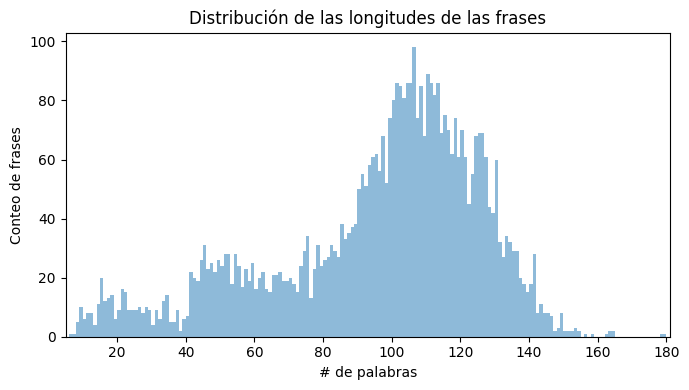

In [22]:
fig, ax1 = plt.subplots(figsize=(7, 4))

# fixed bin size
bins = np.arange(0, max(sent_lens)+1, 1) # fixed bin size

color = 'tab:blue'
ax1.set_xlabel('# de palabras')
ax1.set_ylabel('Conteo de frases')
ax1.set_xlim([min(sent_lens)-1, max(sent_lens)+1])
ax1.hist(sent_lens, bins=bins, alpha=0.5, color=color)
plt.title("Distribución de las longitudes de las frases")


fig.tight_layout()
plt.show()


In [23]:
sent_lens_ = [len(sent.split()) for sent in ground_truth['skill_1_definition']]

print("Longitud promedio de las frases: ", np.mean(sent_lens_))
print("Frase más larga: ", np.max(sent_lens_))

Longitud promedio de las frases:  24.427313337587748
Frase más larga:  63


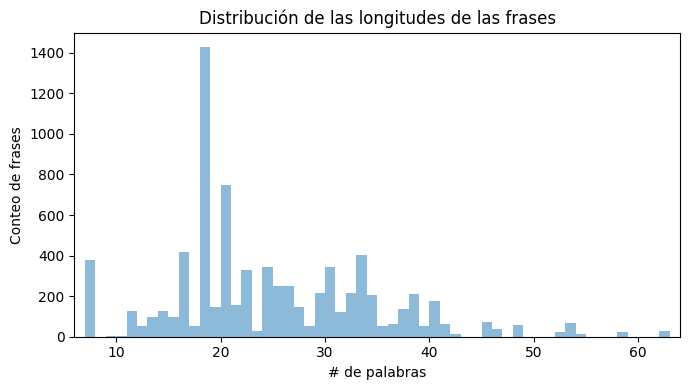

In [24]:
fig, ax1 = plt.subplots(figsize=(7, 4))

# fixed bin size
bins = np.arange(0, max(sent_lens_)+1, 1) # fixed bin size

color = 'tab:blue'
ax1.set_xlabel('# de palabras')
ax1.set_ylabel('Conteo de frases')
ax1.set_xlim([min(sent_lens_)-1, max(sent_lens_)+1])
ax1.hist(sent_lens_, bins=bins, alpha=0.5, color=color)
plt.title("Distribución de las longitudes de las frases")


fig.tight_layout()
plt.show()


#Desbalande de datos (habilidad principal)

In [10]:
ground_truth['skill_1'].value_counts()

Listening                     1159
Speaking                       558
JavaScript                     219
Desarrollo frontend            201
Ciberseguridad                 185
                              ... 
Herramientas de diseño           4
Google Ads                       3
Financial services               2
Automatización de procesos       2
PHP                              1
Name: skill_1, Length: 155, dtype: int64

In [11]:
ground_truth = ground_truth[(ground_truth['skill_1'] != 'Listening') & (ground_truth['skill_1'] != 'Speaking')]
#Eliminamos registros de skill 1 de la academia de inglés

In [12]:
mean = ground_truth['skill_1'].value_counts().mean()
ground_truth[ground_truth['skill_1'].map(ground_truth['skill_1'].value_counts()) >= mean]['skill_1'].nunique()

48

#Embedding preprocessing

Eliminamos puntuacion y caracteres especiales

In [13]:
import re

ground_truth['nombre_skill1_def'] = ground_truth.apply(lambda row: re.sub(r'[^\w\s]','', row['nombre_skill1_def']), axis=1)

#Random Oversampling

In [14]:
pip install -U imbalanced-learn

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.7/257.7 kB 2.0 MB/s eta 0:00:00
  Attempting uninstall: imbalanced-learn
    Found existing installation: imbalanced-learn 0.10.1
    Uninstalling imbalanced-learn-0.10.1:
      Successfully uninstalled imbalanced-learn-0.10.1


In [15]:
from imblearn.over_sampling import RandomOverSampler

max_count = ground_truth['skill_1'].value_counts().max()

# Aplicar Random Oversampling para igualar el número de registros en cada clase al recuento máximo
ros = RandomOverSampler(sampling_strategy={cls: max_count for cls in ground_truth['skill_1'].unique()}, random_state=42)
X_resampled, y_resampled = ros.fit_resample(ground_truth, ground_truth['skill_1'])

# Convertir los datos resampleados a un DataFrame de Pandas
ground_truth_balanced = pd.DataFrame(X_resampled, columns=ground_truth.columns)
ground_truth_balanced['skill_1'] = y_resampled

ground_truth_balanced['skill_1'].value_counts()


Trabajo colaborativo                                  219
Salud física                                          219
Gestión de stakeholders                               219
Analítica de personas                                 219
Adquisición del talento                               219
                                                     ... 
Design thinking                                       219
Propuesta de valor                                    219
Modelos de negocio                                    219
Computadores, dispositivos electrónicos e internet    219
Herramientas de ventas                                219
Name: skill_1, Length: 153, dtype: int64

In [16]:
ground_truth_balanced[ground_truth_balanced['skill_1'] == 'PHP']

,nombre_contenido,descripcion_contenido,skill_1,skill_1_definition,nombre_skill1_def,nombre_contenido_def
5986,Cómo Descargar e Instalar Composer en Windows 10,En este video aprenderás de manera detallada c...,PHP,Habilidad para programar usando el lenguaje PHP.,PHP Habilidad para programar usando el lenguaj...,Cómo Descargar e Instalar Composer en Windows ...
23915,Cómo Descargar e Instalar Composer en Windows 10,En este video aprenderás de manera detallada c...,PHP,Habilidad para programar usando el lenguaje PHP.,PHP Habilidad para programar usando el lenguaj...,Cómo Descargar e Instalar Composer en Windows ...
23916,Cómo Descargar e Instalar Composer en Windows 10,En este video aprenderás de manera detallada c...,PHP,Habilidad para programar usando el lenguaje PHP.,PHP Habilidad para programar usando el lenguaj...,Cómo Descargar e Instalar Composer en Windows ...
23917,Cómo Descargar e Instalar Composer en Windows 10,En este video aprenderás de manera detallada c...,PHP,Habilidad para programar usando el lenguaje PHP.,PHP Habilidad para programar usando el lenguaj...,Cómo Descargar e Instalar Composer en Windows ...
23918,Cómo Descargar e Instalar Composer en Windows 10,En este video aprenderás de manera detallada c...,PHP,Habilidad para programar usando el lenguaje PHP.,PHP Habilidad para programar usando el lenguaj...,Cómo Descargar e Instalar Composer en Windows ...
...,...,...,...,...,...,...
24128,Cómo Descargar e Instalar Composer en Windows 10,En este video aprenderás de manera detallada c...,PHP,Habilidad para programar usando el lenguaje PHP.,PHP Habilidad para programar usando el lenguaj...,Cómo Descargar e Instalar Composer en Windows ...
24129,Cómo Descargar e Instalar Composer en Windows 10,En este video aprenderás de manera detallada c...,PHP,Habilidad para programar usando el lenguaje PHP.,PHP Habilidad para programar usando el lenguaj...,Cómo Descargar e Instalar Composer en Windows ...
24130,Cómo Descargar e Instalar Composer en Windows 10,En este video aprenderás de manera detallada c...,PHP,Habilidad para programar usando el lenguaje PHP.,PHP Habilidad para programar usando el lenguaj...,Cómo Descargar e Instalar Composer en Windows ...
24131,Cómo Descargar e Instalar Composer en Windows 10,En este video aprenderás de manera detallada c...,PHP,Habilidad para programar usando el lenguaje PHP.,PHP Habilidad para programar usando el lenguaj...,Cómo Descargar e Instalar Composer en Windows ...


#Embedding 1: ground_truth_balanced

In [17]:
# encode categories into labele columns
from sklearn.preprocessing import LabelBinarizer
mlb = LabelBinarizer()
labels = mlb.fit_transform(ground_truth_balanced['nombre_skill1_def'])
labels

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [18]:
# We successfully generated a category encoding for every article
len(labels)

33507

In [19]:
labels[1]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0])

In [24]:
df = pd.concat([ground_truth_balanced[['nombre_contenido_def']], pd.DataFrame(labels)], axis=1)
df.columns = ['nombre_contenido_def'] + list(mlb.classes_)
df.head(4)


,nombre_contenido_def,Adaptabilidad Habilidad para responder adecuadamente a las exigencias del entorno regulando el pensamiento y el comportamiento para lograr la adaptación y apreciar la diversidad de perspectivas y variables circunstanciales implicadas en cada nueva situación,Administración de bases de datos Habilidad para asegurar la integridad de las bases de datos de una organización y favorecer el óptimo performance del motor de base de datos con el fin de garantizar la continuidad y disponibilidad del servicio de bases de datos,Adquisición del talento Habilidad para desarrollar estrategias encaminadas a la identificación de empleados idóneos para ejercer un cargo que encajen con la cultura organizacional de la compañía y se adapten a las expectativas de su rol,Agilidad de negocios Habilidad de para adaptarse rápidamente a los cambios del mercado y aprovecharlos en beneficio de un negocio,Alimentación saludable Habilidad para alcanzar bienestar mediante la instalación de hábitos de alimentación suficiente armónica completa y balanceada,Analítica de personas Habilidad para identificar cuantificar y analizar sistemáticamente datos sobre el comportamiento rendimiento eficiencia motivación compromiso y adhesión a la cultura de los trabajadores de una organización con el propósito de predecir el desempeño y productividad de los equipos impulsar los resultados del negocio y obtener tendencias y conclusiones que faciliten la toma de decisiones,Analítica en marketing Habilidad para emplear metodologías y tecnologías para evaluar el éxito de una iniciativa o campaña de marketing digital,Análisis de datos Habilidad para examinar un conjunto de datos con miras a identificar tendencias patrones o datos que revelen insights para guiar la toma de decisiones o el diseño de soluciones,Análisis de escenarios Habilidad para generar interacciones modeladas con el entorno proyectando y comparando diversos escenarios posibles con miras a contrastar las amenazas e identificar las oportunidades que desencadenaría la toma determinadas decisiones,...,Tendencias digitales Habilidad para reconocer el impacto acelerador de la productividad la competitividad y la ciberseguridad de las nuevas tecnologías digitales y visualizar escenarios requisitos desafíos y oportunidades para incorporarlas en diversas estrategias y procesos del negocio,Toma de decisiones Habilidad para sustentar las decisiones críticas con datos o modelos de datos de alta calidad y confiabilidad,Trabajo colaborativo Habilidad para producir bienes y servicios en coordinación con otras personas que comparten un mismo objetivo y hacen parte de la misma comunidad de individuos autoorganizada,Transformación digital Habilidad para generar las transformaciones organizacionales en términos de las personas la cultura y los modelos que se requieran para acelerar el desarrollo de estrategias digitales en los negocios,UX Research Habilidad para emprender procesos de investigación que conduzcan a obtener información precisa y completa sobre los usuarios potenciales de un producto o servicio su contexto y su comportamiento para diseñar u optimizar productos o servicios que se ajusten a sus necesidades reales,Venta consultiva Habilidad para asumir el rol de consultor o asesor durante el proceso de venta buscando conocer las necesidades y problemáticas específicas de los clientes con el fin de satisfacerlas mediante la oferta de productos o servicios especializados,Visualización de datos Habilidad para presentar datos empleando atributos visuales en forma de gráficos infografías diagramas o mapas,Vocabulary Habilidad para expresarse en más de una forma respetando los contextos de uso de esa lengua así como para comprender una variedad de enunciados y emitir juicios sobre su precisión,Writing Habilidad para comunicar eficazmente datos ideas hechos opiniones y sentimientos de forma escrita empleando el sistema lingüístico propio del inglés,eOperations Habilidad para gestionar y mejorar constantemen

In [37]:
import os
import numpy as np
import shutil
import sys
import tqdm.notebook as tq
from collections import defaultdict

import torch
import torch.nn as nn

device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')

In [38]:
#df_data = df.loc[df.iloc[:,2:].apply(sum, axis=1) == 1,:].sample(n = 10_000, random_state = 4)
df_data = df
df_data.head()

,nombre_contenido_def,Adaptabilidad Habilidad para responder adecuadamente a las exigencias del entorno regulando el pensamiento y el comportamiento para lograr la adaptación y apreciar la diversidad de perspectivas y variables circunstanciales implicadas en cada nueva situación,Administración de bases de datos Habilidad para asegurar la integridad de las bases de datos de una organización y favorecer el óptimo performance del motor de base de datos con el fin de garantizar la continuidad y disponibilidad del servicio de bases de datos,Adquisición del talento Habilidad para desarrollar estrategias encaminadas a la identificación de empleados idóneos para ejercer un cargo que encajen con la cultura organizacional de la compañía y se adapten a las expectativas de su rol,Agilidad de negocios Habilidad de para adaptarse rápidamente a los cambios del mercado y aprovecharlos en beneficio de un negocio,Alimentación saludable Habilidad para alcanzar bienestar mediante la instalación de hábitos de alimentación suficiente armónica completa y balanceada,Analítica de personas Habilidad para identificar cuantificar y analizar sistemáticamente datos sobre el comportamiento rendimiento eficiencia motivación compromiso y adhesión a la cultura de los trabajadores de una organización con el propósito de predecir el desempeño y productividad de los equipos impulsar los resultados del negocio y obtener tendencias y conclusiones que faciliten la toma de decisiones,Analítica en marketing Habilidad para emplear metodologías y tecnologías para evaluar el éxito de una iniciativa o campaña de marketing digital,Análisis de datos Habilidad para examinar un conjunto de datos con miras a identificar tendencias patrones o datos que revelen insights para guiar la toma de decisiones o el diseño de soluciones,Análisis de escenarios Habilidad para generar interacciones modeladas con el entorno proyectando y comparando diversos escenarios posibles con miras a contrastar las amenazas e identificar las oportunidades que desencadenaría la toma determinadas decisiones,...,Tendencias digitales Habilidad para reconocer el impacto acelerador de la productividad la competitividad y la ciberseguridad de las nuevas tecnologías digitales y visualizar escenarios requisitos desafíos y oportunidades para incorporarlas en diversas estrategias y procesos del negocio,Toma de decisiones Habilidad para sustentar las decisiones críticas con datos o modelos de datos de alta calidad y confiabilidad,Trabajo colaborativo Habilidad para producir bienes y servicios en coordinación con otras personas que comparten un mismo objetivo y hacen parte de la misma comunidad de individuos autoorganizada,Transformación digital Habilidad para generar las transformaciones organizacionales en términos de las personas la cultura y los modelos que se requieran para acelerar el desarrollo de estrategias digitales en los negocios,UX Research Habilidad para emprender procesos de investigación que conduzcan a obtener información precisa y completa sobre los usuarios potenciales de un producto o servicio su contexto y su comportamiento para diseñar u optimizar productos o servicios que se ajusten a sus necesidades reales,Venta consultiva Habilidad para asumir el rol de consultor o asesor durante el proceso de venta buscando conocer las necesidades y problemáticas específicas de los clientes con el fin de satisfacerlas mediante la oferta de productos o servicios especializados,Visualización de datos Habilidad para presentar datos empleando atributos visuales en forma de gráficos infografías diagramas o mapas,Vocabulary Habilidad para expresarse en más de una forma respetando los contextos de uso de esa lengua así como para comprender una variedad de enunciados y emitir juicios sobre su precisión,Writing Habilidad para comunicar eficazmente datos ideas hechos opiniones y sentimientos de forma escrita empleando el sistema lingüístico propio del inglés,eOperations Habilidad para gestionar y mejorar constantemen

In [39]:
df_data.to_csv('processed_data.csv', index=False)

In [40]:
# Combine title and abstract to increase power
#df_data["combined"] = df_data["nombre_contenido"] + ". " + df_data["skill_1_definition"]
#df_data.drop(columns=["skill_1_definition", "nombre_contenido"], axis=1, inplace=True)

In [40]:
from sklearn.model_selection import train_test_split
# split into train and test
df_train, df_test = train_test_split(df_data, random_state=77, test_size=0.30, shuffle=True)
# split test into test and validation datasets
df_test, df_valid = train_test_split(df_test, random_state=88, test_size=0.50, shuffle=True)

In [41]:
print(f"Train: {df_train.shape}, Test: {df_test.shape}, Valid: {df_valid.shape}")

Train: (23454, 154), Test: (5026, 154), Valid: (5027, 154)


In [42]:
# Hyperparameters
MAX_LEN = 256
TRAIN_BATCH_SIZE = 32
VALID_BATCH_SIZE = 32
TEST_BATCH_SIZE = 32
EPOCHS = 10
LEARNING_RATE = 1e-05

In [ ]:
from transformers import BertTokenizer, BertModel

In [ ]:
tokenizer = BertTokenizer.from_pretrained('bert-base-uncased')

In [ ]:
# Test the tokenizer
test_text = "We are testing BERT tokenizer."
# generate encodings
encodings = tokenizer.encode_plus(test_text,
                                  add_special_tokens = True,
                                  max_length = 50,
                                  truncation = True,
                                  padding = "max_length",
                                  return_attention_mask = True,
                                  return_tensors = "pt")
# we get a dictionary with three keys (see: https://huggingface.co/transformers/glossary.html)
encodings

In [ ]:
df_train['combined']

In [ ]:
class CustomDataset(torch.utils.data.Dataset):

    def __init__(self, dataframe, tokenizer, max_len, target_list):
        self.tokenizer = tokenizer
        self.data = dataframe
        self.combined = dataframe.combined
        self.targets = self.data.list
        self.max_len = max_len

    def __len__(self):
        return len(self.comment_text)

    def __getitem__(self, index):
        combined = str(self.combined[index])
        combined = " ".join(combined.split())

        inputs = self.tokenizer.encode_plus(
            combined,
            None,
            add_special_tokens=True,
            max_length=self.max_len,
            pad_to_max_length=True,
            return_token_type_ids=True
        )
        ids = inputs['input_ids']
        mask = inputs['attention_mask']
        token_type_ids = inputs["token_type_ids"]


        return {
            'ids': torch.tensor(ids, dtype=torch.long),
            'mask': torch.tensor(mask, dtype=torch.long),
            'token_type_ids': torch.tensor(token_type_ids, dtype=torch.long),
            'targets': torch.tensor(self.targets[index], dtype=torch.float)
        }

In [ ]:
target_list = list(df_data.columns)
target_list

In [ ]:
target_list = target_list[:-1]

In [ ]:
train_dataset = CustomDataset(df_train, tokenizer, MAX_LEN, target_list)
valid_dataset = CustomDataset(df_valid, tokenizer, MAX_LEN, target_list)
test_dataset = CustomDataset(df_test, tokenizer, MAX_LEN, target_list)

In [ ]:
# testing the dataset
next(iter(train_dataset))

In [ ]:

# Data loaders
train_data_loader = torch.utils.data.DataLoader(train_dataset,
    batch_size=TRAIN_BATCH_SIZE,
    shuffle=True,
    num_workers=0
)

val_data_loader = torch.utils.data.DataLoader(valid_dataset,
    batch_size=VALID_BATCH_SIZE,
    shuffle=False,
    num_workers=0
)

test_data_loader = torch.utils.data.DataLoader(test_dataset,
    batch_size=TEST_BATCH_SIZE,
    shuffle=False,
    num_workers=0
)

In [ ]:
class BERTClass(torch.nn.Module):
    def __init__(self):
        super(BERTClass, self).__init__()
        self.bert_model = BertModel.from_pretrained('bert-base-uncased', return_dict=True)
        self.dropout = torch.nn.Dropout(0.3)
        self.linear = torch.nn.Linear(768, 8)

    def forward(self, input_ids, attn_mask, token_type_ids):
        output = self.bert_model(
            input_ids,
            attention_mask=attn_mask,
            token_type_ids=token_type_ids
        )
        output_dropout = self.dropout(output.pooler_output)
        output = self.linear(output_dropout)
        return output

model = BERTClass()

# # Freezing BERT layers: (tested, weaker convergence)
# for param in model.bert_model.parameters():
#     param.requires_grad = False

model.to(device)

In [ ]:
def loss_fn(outputs, targets):
    return torch.nn.BCEWithLogitsLoss()(outputs, targets)

In [ ]:
from transformers import AdamW

# define the optimizer
optimizer = AdamW(model.parameters(), lr = 1e-5)

In [ ]:
# Training of the model for one epoch
def train_model(training_loader, model, optimizer):

    losses = []
    correct_predictions = 0
    num_samples = 0
    # set model to training mode (activate droput, batch norm)
    model.train()
    # initialize the progress bar
    loop = tq.tqdm(enumerate(training_loader), total=len(training_loader),
                      leave=True, colour='steelblue')
    for batch_idx, data in loop:
        ids = data['input_ids'].to(device, dtype = torch.long)
        mask = data['attention_mask'].to(device, dtype = torch.long)
        token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
        targets = data['targets'].to(device, dtype = torch.float)

        # forward
        outputs = model(ids, mask, token_type_ids) # (batch,predict)=(32,8)
        loss = loss_fn(outputs, targets)
        losses.append(loss.item())
        # training accuracy
        _, preds = torch.max(outputs, dim=1) # batch dim
        _, targ = torch.max(targets, dim=1)  # batch dim
        num_samples += len(targ)  # technically adding batch size
        correct_predictions += torch.sum(preds == targ)

        # backward
        optimizer.zero_grad()
        loss.backward()
        nn.utils.clip_grad_norm_(model.parameters(), max_norm=1.0)
        # grad descent step
        optimizer.step()

        # Update progress bar
        #loop.set_description(f"")
        #loop.set_postfix(batch_loss=loss)

    # returning: trained model, model accuracy, mean loss
    return model, float(correct_predictions)/num_samples, np.mean(losses)

In [ ]:
def eval_model(validation_loader, model, optimizer):
    losses = []
    correct_predictions = 0
    num_samples = 0
    # set model to eval mode (turn off dropout, fix batch norm)
    model.eval()

    with torch.no_grad():
        for batch_idx, data in enumerate(validation_loader, 0):
            ids = data['input_ids'].to(device, dtype = torch.long)
            mask = data['attention_mask'].to(device, dtype = torch.long)
            token_type_ids = data['token_type_ids'].to(device, dtype = torch.long)
            targets = data['targets'].to(device, dtype = torch.float)
            outputs = model(ids, mask, token_type_ids)

            loss = loss_fn(outputs, targets)
            losses.append(loss.item())

            # validation accuracy
            _, preds = torch.max(outputs, dim=1) # batch dim
            _, targ = torch.max(targets, dim=1)  # batch dim
            num_samples += len(targ)  # technically adding batch size
            correct_predictions += torch.sum(preds == targ)

    return float(correct_predictions)/num_samples, np.mean(losses)

#Entrenamiento del modelo


In [ ]:
history = defaultdict(list)
best_accuracy = 0

for epoch in range(1, EPOCHS+1):
    print(f'Epoch {epoch}/{EPOCHS}')
    model, train_acc, train_loss = train_model(train_data_loader, model, optimizer)
    val_acc, val_loss = eval_model(val_data_loader, model, optimizer)

    print(f'train_loss={train_loss:.4f}, val_loss={val_loss:.4f} train_acc={train_acc:.4f}, val_acc={val_acc:.4f}')

    history['train_acc'].append(train_acc)
    history['train_loss'].append(train_loss)
    history['val_acc'].append(val_acc)
    history['val_loss'].append(val_loss)
    # save the best model
    if val_acc > best_accuracy:
        torch.save(model.state_dict(), os.path.join(data_dir,"output","best_model_state.bin"))
        best_accuracy = val_acc